<h1>App Physics 155 - LE 2</h1>
<h2>Kenneth V. Domingo<br />
2015-03116</h2>

<b>Problem 2.5: Image deconvolution</b>

a) On the web site [http://www-personal.umich.edu/~mejn/cp/data/blur.txt] you will find a file called blur.txt that contains a grid of values representing brightness on a black-and-white photo — a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width σ = 25. Write a program that reads the grid of values into a two-dimensional array of real numbers and then draws the values on the screen of the computer as a density plot. You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.)

b) Write another program that creates an array, of the same size as the photo, containing a grid of samples from drawn from the Gaussian $f(x,y)$ above with $\sigma = 25$. Make a density plot of these values on the screen too, so that you get a visualization of your point spread function. Remember that the point spread function is periodic (along both axes), which means that the values for negative $x$ and $y$ are repeated at the end of the interval. Since the Gaussian is centered on the origin, this means there should be bright patches in each of the four corners of your picture.

c) Combine your two programs and add Fourier transforms using the functions rfft2 and irfft2 from numpy.fft, to make a program that does the following:

i) Reads in the blurred photo<br />
ii) Calculates the point spread function<br />
iii) Fourier transforms both <br />
iv) Divides one by the other<br />
v) Performs an inverse transform to get the unblurred photo<br />
vi) Displays the unblurred photo on the screen<br />

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. Hint: One thing you’ll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you’ll get an error (because you can’t divide by zero) or just a very large number (because you’re dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don’t divide by it — just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{−3}$.

d) Bearing in mind this last point about zeros in the Fourier transform, what is it that limits our ability to deblur a photo? Why can we not perfectly unblur any photo and make it completely sharp?

In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as mp
%matplotlib inline

In [2]:
blur = np.loadtxt("blur.txt")

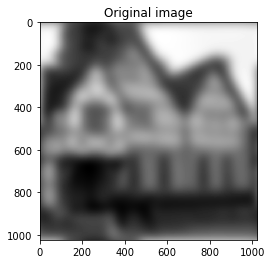

In [4]:
mp.imshow(blur)
mp.title("Original image")
mp.gray()
mp.show()

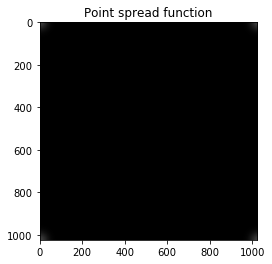

In [5]:
sigma = 25
def f(x,y):
    return np.exp(-(x**2 + y**2)/2/sigma**2)
gaussian = np.zeros(blur.shape, float)
for i in range(blur.shape[0]):
    for j in range(blur.shape[1]):
        gaussian[i,j] += f(i,j)
        gaussian[-i,-j] += f(i,j)
        gaussian[-i,j] += f(i,j)
        gaussian[i,-j] += f(i,j)
mp.imshow(gaussian)
mp.title("Point spread function")
mp.show()

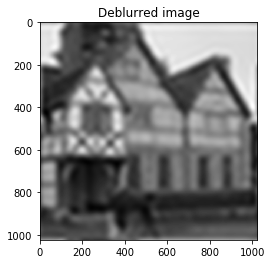

In [6]:
fimg = fft.rfft2(blur)
fpsf = fft.rfft2(gaussian)
c = np.ones_like(fimg)
c[fpsf>1e-3] = fimg[fpsf>1e-3]/fpsf[fpsf>1e-3]
c[fpsf<=1e-3] = fimg[fpsf<=1e-3]
dblur = fft.irfft2(c)

mp.imshow(dblur)
mp.title("Deblurred image")
mp.show()